(redemption-weights)=
# Redemption (Weights)

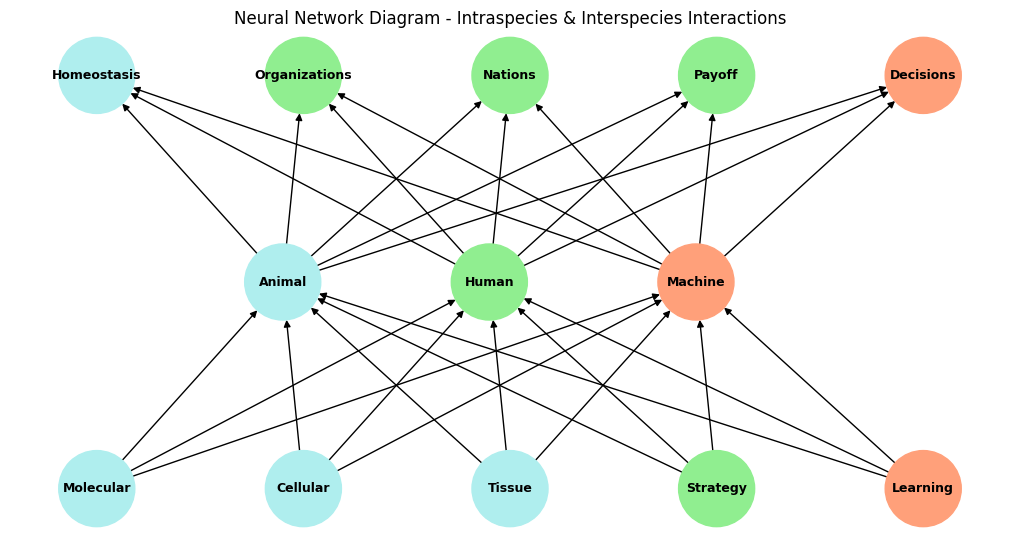

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
input_nodes = [
    'Molecular', 'Cellular', 'Tissue', 
    'Strategy', 'Learning'
]
output_nodes = [
    'Homeostasis', 'Organizations', 'Nations', 
    'Payoff', 'Decisions'
]

hidden_layer_labels = ['Animal', 'Human', 'Machine']

# Initialize graph
G = nx.DiGraph()

# Add input layer nodes
for i in range(len(input_nodes)):
    G.add_node(input_nodes[i], layer='input')

# Add hidden layer nodes and label them
for i in range(len(hidden_layer_labels)):
    G.add_node(hidden_layer_labels[i], layer='hidden')

# Add output layer nodes
for i in range(len(output_nodes)):
    G.add_node(output_nodes[i], layer='output')

# Add edges between input and hidden nodes
for i in range(len(input_nodes)):
    for j in range(len(hidden_layer_labels)):
        G.add_edge(input_nodes[i], hidden_layer_labels[j])

# Add edges between hidden and output nodes
for i in range(len(hidden_layer_labels)):
    for j in range(len(output_nodes)):
        G.add_edge(hidden_layer_labels[i], output_nodes[j])

# Define layout to rotate the graph so that the input layer is at the bottom and the output at the top
pos = {}
for i, node in enumerate(input_nodes):
    pos[node] = (i * 0.5, 0)  # Input nodes at the bottom

for i, node in enumerate(output_nodes):
    pos[node] = (i * 0.5, 2)  # Output nodes at the top

# Add hidden layer nodes in the middle
for i, node in enumerate(hidden_layer_labels):
    pos[node] = ((i + .9) * .5, 1)  # Hidden nodes in the middle layer

# Draw the graph with different colors for specific nodes
node_colors = []
for node in G.nodes():
    if node in ['Homeostasis', 'Animal', 'Molecular', 'Cellular', 'Tissue']:
        node_colors.append('paleturquoise')
    elif node in ['Strategy', 'Human', 'Organizations', 'Nations', 'Payoff']:
        node_colors.append('lightgreen')
    elif node in ['Learning', 'Machine', 'Decisions']:
        node_colors.append('lightsalmon')
    else:
        node_colors.append('lightgray')

plt.figure(figsize=(10, 5))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=9, font_weight='bold', arrows=True)

# Show the plot
plt.title("Neural Network Diagram - Intraspecies & Interspecies Interactions")
plt.show()

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
_Redemption_. This involves negotiating strategic alliances (green). Childhood innocence under the umbrella of parents and family will not suffice, since growth demands engagement with broader social cirles. But the weights & biases of the various edges are rarely zero. Consider dogs for instance. Dogs seem to have a built-in understanding of risk management—like they have their own mental `strategic` model of "insurance." They instinctively gauge threats, avoid dangerous situations, and seek comfort in predictable routines, acting almost like they're securing their well-being in a world of uncertainty. They 'pay their premiums' by staying loyal to their owners and maintaining social bonds, ensuring their 'coverage' in terms of protection, food, and care. It’s as if dogs, through their pack mentality and relationships with `humans`, understand the trade-offs of loyalty and survival (see {ref}`fall`). They choose to be loyal, which gives them access to a "policy" that covers them against hunger, danger, and solitude. If we extend that analogy, dogs might even grasp "risk pools," sharing the burden and reward of protection within the pack. Maybe they don't need actuaries—just good instincts and trust in the pack! But `learning` [war](https://www.nobelprize.org/uploads/2018/06/aumann-lecture.pdf) & the craft of making spears against their master is beyond their abilities. So their roulette bet is on the hope & goodwill of their master. Tyler Perry's _Beauty in Black_ asks whether its protagonists can evolve from animal & human -- and will-to-power to become übermench or überfrau. 
```

In [4]:
import pygame
import random

# Initialize Pygame
pygame.init()

# Constants
SCREEN_WIDTH, SCREEN_HEIGHT = 800, 600
RING_RADIUS = 200
WRESTLER_RADIUS = 25
SPEED = 5

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)

# Setup the display
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Sumo Wrestling")

class Wrestler:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color
        self.dx = 0
        self.dy = 0

    def move(self):
        self.x += self.dx
        self.y += self.dy

    def push(self, other):
        # Simple push logic, can be enhanced
        dx = other.x - self.x
        dy = other.y - self.y
        distance = (dx**2 + dy**2)**0.5
        if distance < WRESTLER_RADIUS * 2:
            other.dx = -dx * 0.1
            other.dy = -dy * 0.1

    def draw(self, surface):
        pygame.draw.circle(surface, self.color, (int(self.x), int(self.y)), WRESTLER_RADIUS)

def is_out_of_ring(wrestler):
    distance = ((wrestler.x - SCREEN_WIDTH/2)**2 + (wrestler.y - SCREEN_HEIGHT/2)**2)**0.5
    return distance > RING_RADIUS

# Create wrestlers
red_wrestler = Wrestler(SCREEN_WIDTH//2 - 50, SCREEN_HEIGHT//2, RED)
blue_wrestler = Wrestler(SCREEN_WIDTH//2 + 50, SCREEN_HEIGHT//2, BLUE)

# Game loop
running = True
clock = pygame.time.Clock()
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Clear the screen
    screen.fill(BLACK)

    # Draw the ring
    pygame.draw.circle(screen, WHITE, (SCREEN_WIDTH//2, SCREEN_HEIGHT//2), RING_RADIUS, 2)

    # Handle keyboard input for red wrestler
    keys = pygame.key.get_pressed()
    red_wrestler.dx = (keys[pygame.K_RIGHT] - keys[pygame.K_LEFT]) * SPEED
    red_wrestler.dy = (keys[pygame.K_DOWN] - keys[pygame.K_UP]) * SPEED

    # AI or simple input for blue wrestler
    blue_wrestler.dx = random.choice([-1, 0, 1]) * SPEED
    blue_wrestler.dy = random.choice([-1, 0, 1]) * SPEED

    # Move wrestlers
    red_wrestler.move()
    blue_wrestler.move()

    # Push logic
    red_wrestler.push(blue_wrestler)
    blue_wrestler.push(red_wrestler)

    # Check if out of ring
    if is_out_of_ring(red_wrestler):
        print("Blue Wins!")
        running = False
    if is_out_of_ring(blue_wrestler):
        print("Red Wins!")
        running = False

    # Keep wrestlers within screen bounds
    red_wrestler.x = max(WRESTLER_RADIUS, min(red_wrestler.x, SCREEN_WIDTH - WRESTLER_RADIUS))
    red_wrestler.y = max(WRESTLER_RADIUS, min(red_wrestler.y, SCREEN_HEIGHT - WRESTLER_RADIUS))
    blue_wrestler.x = max(WRESTLER_RADIUS, min(blue_wrestler.x, SCREEN_WIDTH - WRESTLER_RADIUS))
    blue_wrestler.y = max(WRESTLER_RADIUS, min(blue_wrestler.y, SCREEN_HEIGHT - WRESTLER_RADIUS))

    # Draw wrestlers
    red_wrestler.draw(screen)
    blue_wrestler.draw(screen)

    pygame.display.flip()
    clock.tick(60)

pygame.quit()

Red Wins!
